# Autoencdoer에 Conv 사용해보기 과제 

### 들어가기에 앞서 conv를 사용할 경우 predict에서 안되는 경우가 발생하여 predict의 경우 데이터 10000개만을 사용하였음을 알립니다.

In [ ]:
# 사용하고자 하는 모듈 import
import tensorflow as tf                       
from tensorflow.keras import models, layers   
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [ ]:
# MNIST 데이터 로딩
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('train_images의 *원래* 데이터의 shape과 dype:', 
      train_images.shape, train_images.dtype)
print('test_images의 *원래* 데이터의 shape과 dype:', 
      test_images.shape, test_images.dtype)

# Normalizing the images to the range of [0., 1.]
train_images = tf.cast(train_images, tf.float32)
test_images  = tf.cast(test_images, tf.float32)
train_images /= 255
test_images  /= 255

print('train_images의 *바뀐* 데이터의 shape과 dype:', 
      train_images.shape, train_images.dtype)
print('test_images의 *바뀐* 데이터의 shape과 dype:', 
      test_images.shape, test_images.dtype)

train_images의 *원래* 데이터의 shape과 dype: (60000, 28, 28) uint8
test_images의 *원래* 데이터의 shape과 dype: (10000, 28, 28) uint8
train_images의 *바뀐* 데이터의 shape과 dype: (60000, 28, 28) <dtype: 'float32'>
test_images의 *바뀐* 데이터의 shape과 dype: (10000, 28, 28) <dtype: 'float32'>


# 최고로 좋은 성능을 보이는 모델을 먼저 보이고 후에 실험한 내용들에 대하여 언급하고자 한다. 

In [ ]:
n_dim = 4
# 잠재 차원의 경우 4개로 하였다.
enc = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(28,28)),
                                  tf.keras.layers.Conv1D(128,kernel_size=5,activation='elu',strides=2),
                                  tf.keras.layers.Conv1D(64,kernel_size=5,activation='elu',strides=2),
                                  tf.keras.layers.Conv1D(16,kernel_size=3,activation='elu'),
                                  tf.keras.layers.Conv1D(n_dim,kernel_size=2),
                                  tf.keras.layers.Flatten()])
# Conv1D를 사용하였고 Kernel_size를 다르게 두는게 효과가 좋았다. 또한 activation function은 elu를 두는것이 더 좋았다. 
dec = tf.keras.models.Sequential([
                                  tf.keras.layers.InputLayer(input_shape=(n_dim,)),
                                  tf.keras.layers.Reshape(target_shape=(1, n_dim)),
                                  tf.keras.layers.Conv1D(16,kernel_size=1,activation='elu'),
                                  tf.keras.layers.Conv1D(64,kernel_size=1,activation='elu'),
                                  tf.keras.layers.Conv1D(256,kernel_size=1,activation='elu'),
                                  tf.keras.layers.Conv1D(784,kernel_size=1,activation='sigmoid'),
                                  tf.keras.layers.Reshape(target_shape=(28,28))
])

ae = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28, 28)),
  enc,
  dec,                               
])

In [ ]:
ae.compile(optimizer='Adam', # optimizer의 name 혹은 함수 객체 설정
           loss='mse', 
           metrics=['mae'])

ae.fit(train_images, train_images, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0418 - mae: 0.1004
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0326 - mae: 0.0804
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0307 - mae: 0.0759
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0296 - mae: 0.0734
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0288 - mae: 0.0717
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0282 - mae: 0.0704
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0278 - mae: 0.0694
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0274 - mae: 0.0686
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0271 - mae: 0.0679
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0268 - mae: 0.0673


In [ ]:
y_pred = ae(train_images[:10000,])

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx])
  plt.subplot(122)
  plt.imshow(y_pred[idx])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=9999, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=9999), Output()), _do…

(1001, 4)
(1127, 4)
(991, 4)
(978, 4)


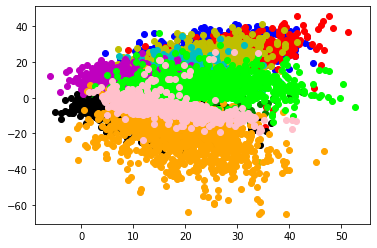

In [ ]:
z = enc(train_images[:10000])

z_0 = z[train_labels[:10000]==0]    # z 배열을 조건을 이용해 slice
z_1 = z[train_labels[:10000]==1]
z_2 = z[train_labels[:10000]==2]
z_3 = z[train_labels[:10000]==3]
z_4 = z[train_labels[:10000]==4]
z_5 = z[train_labels[:10000]==5]
z_6 = z[train_labels[:10000]==6]
z_7 = z[train_labels[:10000]==7]
z_8 = z[train_labels[:10000]==8]
z_9 = z[train_labels[:10000]==9]

print(z_0.shape)
print(z_1.shape)
print(z_2.shape)
print(z_9.shape)

plt.scatter(z_0[:,0], z_0[:,1], c='b')
plt.scatter(z_1[:,0], z_1[:,1], c='g')
plt.scatter(z_2[:,0], z_2[:,1], c='r')
plt.scatter(z_3[:,0], z_3[:,1], c='y')
plt.scatter(z_4[:,0], z_4[:,1], c='k')
plt.scatter(z_5[:,0], z_5[:,1], c='c')
plt.scatter(z_6[:,0], z_6[:,1], c='m')
plt.scatter(z_7[:,0], z_7[:,1], c='orange')
plt.scatter(z_8[:,0], z_8[:,1], c='lime')
plt.scatter(z_9[:,0], z_9[:,1], c = 'pink')
plt.show()

Z 값을 실제 label 값에 따라 색을 달리두고 그래프를 그려보았다. 여기서는 잠재벡터가 4개였지만 그래프로 표현하기 위해서 2개의 벡터만 사용하였음을 유의하여 보아야 할것이다. 하지만 2개의 차원으로만 보았음에도 어느정도 잘 구분이 되고 있음을 볼 수 있다. 

In [ ]:
import ipywidgets as widgets

s=widgets.FloatSlider(min=-20.0, max=20.0)
t=widgets.FloatSlider(min=-20.0, max=20.0)
u=widgets.FloatSlider(min=-20.0, max=20.0)
v=widgets.FloatSlider(min=-20.0, max=20.0)

ui = widgets.HBox([s,t,u,v])

def z_test(s,t,u, v):
  z_test = np.array([[s,t,u,v]])  
  print(z_test)

  img_gen = dec(z_test)
  plt.imshow(img_gen[0])
  plt.show()  

out = widgets.interactive_output(z_test, {'s':s, 't':t, 'u': u, 'v': v})

display(ui, out)

Output()

# Encoder Decoder Model 만들기

n_dim은 DNN과 같은 2개의 value 값을 삽입하기 위해 value가 2개가 나오도록 만들 예정임

Encoder에서는 Conv2D를 사용하고 Decoder에서는 Conv2DTranspose를 활용해보고자 한다.

In [ ]:
n_dim = 2

# Encoder Model 정의하기

In [ ]:
enc = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(28,28)),
                                  tf.keras.layers.Reshape(target_shape=(28,28,1)),
                                  tf.keras.layers.Conv2D(64,kernel_size=(2,2),activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                  tf.keras.layers.Conv2D(32,kernel_size=(2,2),activation='relu'),
                                  tf.keras.layers.Conv2D(16,kernel_size=(2,2),activation='relu'),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(n_dim)])

In [ ]:
enc.summary()

Model: "sequential_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_91 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 27, 27, 64)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 12, 12, 32)        8224      
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 11, 11, 16)        2064      
_________________________________________________________________
flatten_55 (Flatten)         (None, 1936)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)              

# Decoder Model 정의하기

In [ ]:
dec = tf.keras.models.Sequential([
                                  tf.keras.layers.InputLayer(input_shape=(2,)),
                                  tf.keras.layers.Reshape(target_shape=(1,1,2)),
                                  tf.keras.layers.Conv2DTranspose(32,kernel_size=(2,2),strides=7,activation='relu'),
                                  tf.keras.layers.Conv2DTranspose(64,kernel_size=(2,2),strides=2,activation='relu'),
                                  tf.keras.layers.Conv2DTranspose(1,kernel_size=(2,2),strides=2,activation='sigmoid'),
                                  tf.keras.layers.Reshape(target_shape=(28,28))
])

In [ ]:
dec.summary()

Model: "sequential_124"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_92 (Reshape)         (None, 1, 1, 2)           0         
_________________________________________________________________
conv2d_transpose_15 (Conv2DT (None, 7, 7, 32)          288       
_________________________________________________________________
conv2d_transpose_16 (Conv2DT (None, 14, 14, 64)        8256      
_________________________________________________________________
conv2d_transpose_17 (Conv2DT (None, 28, 28, 1)         257       
_________________________________________________________________
reshape_93 (Reshape)         (None, 28, 28)            0         
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


# AutoEncoder Model 정의하기

In [ ]:
ae = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28, 28)),
  enc,
  dec,                               
])

Model: "sequential_125"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_123 (Sequential)  (None, 2)                 14482     
_________________________________________________________________
sequential_124 (Sequential)  (None, 28, 28)            8801      
Total params: 23,283
Trainable params: 23,283
Non-trainable params: 0
_________________________________________________________________


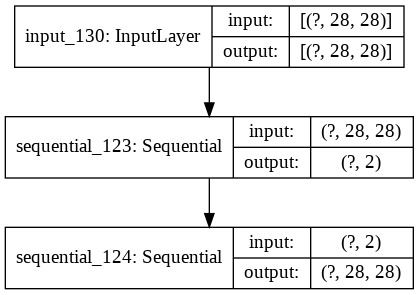

In [ ]:
ae.summary()
tf.keras.utils.plot_model(ae, 'ae.png', show_shapes=True)

In [ ]:
ae.compile(optimizer='Adam', # optimizer의 name 혹은 함수 객체 설정
           loss='mse', 
           metrics=['mae'])

ae.fit(train_images, train_images, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0968 - mae: 0.2175
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0936 - mae: 0.2103
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0936 - mae: 0.2103
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0936 - mae: 0.2103
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0936 - mae: 0.2102
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0936 - mae: 0.2103
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0936 - mae: 0.2103
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0936 - mae: 0.2103
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0936 - mae: 0.2103
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0936 - mae: 0.2103


In [ ]:
y_pred = ae(train_images[:10000,])

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx])
  plt.subplot(122)
  plt.imshow(y_pred[idx])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=9999, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=9999), Output()), _do…

(1001, 2)
(1127, 2)
(991, 2)
(978, 2)


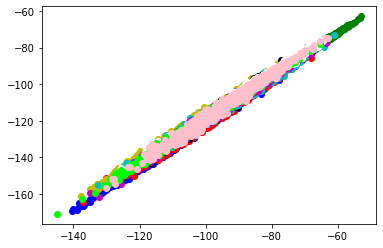

In [ ]:
z = enc(train_images[:10000])

z_0 = z[train_labels[:10000]==0]    # z 배열을 조건을 이용해 slice
z_1 = z[train_labels[:10000]==1]
z_2 = z[train_labels[:10000]==2]
z_3 = z[train_labels[:10000]==3]
z_4 = z[train_labels[:10000]==4]
z_5 = z[train_labels[:10000]==5]
z_6 = z[train_labels[:10000]==6]
z_7 = z[train_labels[:10000]==7]
z_8 = z[train_labels[:10000]==8]
z_9 = z[train_labels[:10000]==9]

print(z_0.shape)
print(z_1.shape)
print(z_2.shape)
print(z_9.shape)

plt.scatter(z_0[:,0], z_0[:,1], c='b')
plt.scatter(z_1[:,0], z_1[:,1], c='g')
plt.scatter(z_2[:,0], z_2[:,1], c='r')
plt.scatter(z_3[:,0], z_3[:,1], c='y')
plt.scatter(z_4[:,0], z_4[:,1], c='k')
plt.scatter(z_5[:,0], z_5[:,1], c='c')
plt.scatter(z_6[:,0], z_6[:,1], c='m')
plt.scatter(z_7[:,0], z_7[:,1], c='w')
plt.scatter(z_8[:,0], z_8[:,1], c='lime')
plt.scatter(z_9[:,0], z_9[:,1], c = 'pink')
plt.show()

결과를 보면 잘 안나오는 것을 볼 수있다. 
stride 7을 처음부터 주는 것이 아니라 마지막에 주어서 작업을 진행해 볼까 한다.


또한 Z값이 분포를 보면 분할이 명확하게 되지 않는다는 것을 볼 수 있다. 이는 Decoder를 활용하여 복원을 할 때에도 잘 안된다는 것과 일맥상통한다.

In [ ]:
enc = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(28,28)),
                                  tf.keras.layers.Reshape(target_shape=(28,28,1)),
                                  tf.keras.layers.Conv2D(64,kernel_size=(2,2),activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                  tf.keras.layers.Conv2D(32,kernel_size=(2,2),activation='relu'),
                                  tf.keras.layers.Conv2D(16,kernel_size=(2,2),activation='relu'),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(n_dim)])

dec = tf.keras.models.Sequential([
                                  tf.keras.layers.InputLayer(input_shape=(2,)),
                                  tf.keras.layers.Reshape(target_shape=(1,1,2)),
                                  tf.keras.layers.Conv2DTranspose(32,kernel_size=(2,2),strides=2,activation='relu'),
                                  tf.keras.layers.Conv2DTranspose(64,kernel_size=(2,2),strides=7,activation='relu'),
                                  tf.keras.layers.Conv2DTranspose(1,kernel_size=(2,2),strides=2,activation='sigmoid'),
                                  tf.keras.layers.Reshape(target_shape=(28,28))
])

ae = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28, 28)),
  enc,
  dec,                               
])

In [ ]:
ae.compile(optimizer='Adam', # optimizer의 name 혹은 함수 객체 설정
           loss='mse', 
           metrics=['mae'])

ae.fit(train_images, train_images, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0951 - mae: 0.2178
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0885 - mae: 0.2007
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0883 - mae: 0.2003
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0882 - mae: 0.2001
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0882 - mae: 0.2000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0881 - mae: 0.1999
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0881 - mae: 0.1998
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0881 - mae: 0.1998
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0880 - mae: 0.1997
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0880 - mae: 0.1997


In [ ]:
y_pred = ae(train_images[:10000,])

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx])
  plt.subplot(122)
  plt.imshow(y_pred[idx])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=9999, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=9999), Output()), _do…

(1001, 2)
(1127, 2)
(991, 2)
(978, 2)


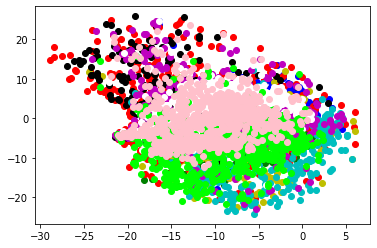

In [ ]:
z = enc(train_images[:10000])

z_0 = z[train_labels[:10000]==0]    # z 배열을 조건을 이용해 slice
z_1 = z[train_labels[:10000]==1]
z_2 = z[train_labels[:10000]==2]
z_3 = z[train_labels[:10000]==3]
z_4 = z[train_labels[:10000]==4]
z_5 = z[train_labels[:10000]==5]
z_6 = z[train_labels[:10000]==6]
z_7 = z[train_labels[:10000]==7]
z_8 = z[train_labels[:10000]==8]
z_9 = z[train_labels[:10000]==9]

print(z_0.shape)
print(z_1.shape)
print(z_2.shape)
print(z_9.shape)

plt.scatter(z_0[:,0], z_0[:,1], c='b')
plt.scatter(z_1[:,0], z_1[:,1], c='g')
plt.scatter(z_2[:,0], z_2[:,1], c='r')
plt.scatter(z_3[:,0], z_3[:,1], c='y')
plt.scatter(z_4[:,0], z_4[:,1], c='k')
plt.scatter(z_5[:,0], z_5[:,1], c='c')
plt.scatter(z_6[:,0], z_6[:,1], c='m')
plt.scatter(z_7[:,0], z_7[:,1], c='w')
plt.scatter(z_8[:,0], z_8[:,1], c='lime')
plt.scatter(z_9[:,0], z_9[:,1], c = 'pink')
plt.show()

z값의 분포가 제대로 퍼져있지 않다는 것을 볼  수 있다. 그래도 이전보다는 나아진듯한 모습을 볼 수 있다. 

# n_dim 값을 더 늘려보고자 한다.

In [ ]:
n_dim = 4

enc = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(28,28)),
                                  tf.keras.layers.Reshape(target_shape=(28,28,1)),
                                  tf.keras.layers.Conv2D(64,kernel_size=(2,2),activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                  tf.keras.layers.Conv2D(32,kernel_size=(2,2),activation='relu'),
                                  tf.keras.layers.Conv2D(16,kernel_size=(2,2),activation='relu'),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(n_dim)])

dec = tf.keras.models.Sequential([
                                  tf.keras.layers.InputLayer(input_shape=(n_dim,)),
                                  tf.keras.layers.Reshape(target_shape=(1,1,n_dim)),
                                  tf.keras.layers.Conv2DTranspose(32,kernel_size=(2,2),strides=2,activation='relu'),
                                  tf.keras.layers.Conv2DTranspose(64,kernel_size=(2,2),strides=7,activation='relu'),
                                  tf.keras.layers.Conv2DTranspose(1,kernel_size=(2,2),strides=2,activation='sigmoid'),
                                  tf.keras.layers.Reshape(target_shape=(28,28))
])

ae = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28, 28)),
  enc,
  dec,                               
])

In [ ]:
ae.compile(optimizer='Adam', # optimizer의 name 혹은 함수 객체 설정
           loss='mse', 
           metrics=['mae'])

ae.fit(train_images, train_images, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0941 - mae: 0.2156
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0877 - mae: 0.1991
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0877 - mae: 0.1989
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0876 - mae: 0.1988
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0876 - mae: 0.1987
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0876 - mae: 0.1987
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0876 - mae: 0.1987
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0876 - mae: 0.1986
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0875 - mae: 0.1986
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0875 - mae: 0.1986


In [ ]:
y_pred = ae(train_images[:10000,])

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx])
  plt.subplot(122)
  plt.imshow(y_pred[idx])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=9999, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=9999), Output()), _do…

(1001, 4)
(1127, 4)
(991, 4)
(978, 4)


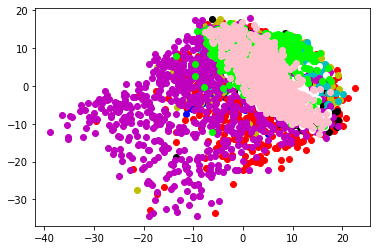

In [ ]:
z = enc(train_images[:10000])

z_0 = z[train_labels[:10000]==0]    # z 배열을 조건을 이용해 slice
z_1 = z[train_labels[:10000]==1]
z_2 = z[train_labels[:10000]==2]
z_3 = z[train_labels[:10000]==3]
z_4 = z[train_labels[:10000]==4]
z_5 = z[train_labels[:10000]==5]
z_6 = z[train_labels[:10000]==6]
z_7 = z[train_labels[:10000]==7]
z_8 = z[train_labels[:10000]==8]
z_9 = z[train_labels[:10000]==9]

print(z_0.shape)
print(z_1.shape)
print(z_2.shape)
print(z_9.shape)

plt.scatter(z_0[:,0], z_0[:,1], c='b')
plt.scatter(z_1[:,0], z_1[:,1], c='g')
plt.scatter(z_2[:,0], z_2[:,1], c='r')
plt.scatter(z_3[:,0], z_3[:,1], c='y')
plt.scatter(z_4[:,0], z_4[:,1], c='k')
plt.scatter(z_5[:,0], z_5[:,1], c='c')
plt.scatter(z_6[:,0], z_6[:,1], c='m')
plt.scatter(z_7[:,0], z_7[:,1], c='w')
plt.scatter(z_8[:,0], z_8[:,1], c='lime')
plt.scatter(z_9[:,0], z_9[:,1], c = 'pink')
plt.show()

차원을 늘렸더니 조금씩 퍼지는 듯한 모습이 보인다. 하지만 여전히 구분은 잘 되지 않는 것 같다.

# 마지막에 넣은 Dense를 제거하고 작업을 진행하고자 한다.

In [ ]:
n_dim = 2

enc = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(28,28)),
                                  tf.keras.layers.Reshape(target_shape=(28,28,1)),
                                  tf.keras.layers.Conv2D(64,kernel_size=(2,2),activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                  tf.keras.layers.Conv2D(32,kernel_size=(2,2),activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                  tf.keras.layers.Conv2D(16,kernel_size=(2,2),activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                  tf.keras.layers.Conv2D(n_dim,kernel_size=(2,2)),
                                  tf.keras.layers.Flatten()])

dec = tf.keras.models.Sequential([
                                  tf.keras.layers.InputLayer(input_shape=(n_dim,)),
                                  tf.keras.layers.Reshape(target_shape=(1,1,n_dim)),
                                  tf.keras.layers.Conv2DTranspose(32,kernel_size=(2,2),strides=2,activation='relu'),
                                  tf.keras.layers.Conv2DTranspose(64,kernel_size=(2,2),strides=7,activation='relu'),
                                  tf.keras.layers.Conv2DTranspose(1,kernel_size=(2,2),strides=2,activation='sigmoid'),
                                  tf.keras.layers.Reshape(target_shape=(28,28))
])

ae = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28, 28)),
  enc,
  dec,                               
])

In [ ]:
ae.compile(optimizer='Adam', # optimizer의 name 혹은 함수 객체 설정
           loss='mse', 
           metrics=['mae'])

ae.fit(train_images, train_images, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0952 - mae: 0.2174
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0891 - mae: 0.2019
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0889 - mae: 0.2016
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0888 - mae: 0.2014
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0888 - mae: 0.2013
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0887 - mae: 0.2012
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0887 - mae: 0.2012
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0887 - mae: 0.2011
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0887 - mae: 0.2011
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0887 - mae: 0.2010


In [ ]:
y_pred = ae(train_images[:10000,])

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx])
  plt.subplot(122)
  plt.imshow(y_pred[idx])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=9999, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=9999), Output()), _do…

(1001, 2)
(1127, 2)
(991, 2)
(978, 2)


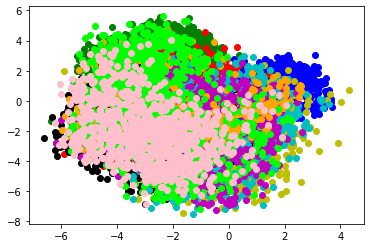

In [ ]:
z = enc(train_images[:10000])

z_0 = z[train_labels[:10000]==0]    # z 배열을 조건을 이용해 slice
z_1 = z[train_labels[:10000]==1]
z_2 = z[train_labels[:10000]==2]
z_3 = z[train_labels[:10000]==3]
z_4 = z[train_labels[:10000]==4]
z_5 = z[train_labels[:10000]==5]
z_6 = z[train_labels[:10000]==6]
z_7 = z[train_labels[:10000]==7]
z_8 = z[train_labels[:10000]==8]
z_9 = z[train_labels[:10000]==9]

print(z_0.shape)
print(z_1.shape)
print(z_2.shape)
print(z_9.shape)

plt.scatter(z_0[:,0], z_0[:,1], c='b')
plt.scatter(z_1[:,0], z_1[:,1], c='g')
plt.scatter(z_2[:,0], z_2[:,1], c='r')
plt.scatter(z_3[:,0], z_3[:,1], c='y')
plt.scatter(z_4[:,0], z_4[:,1], c='k')
plt.scatter(z_5[:,0], z_5[:,1], c='c')
plt.scatter(z_6[:,0], z_6[:,1], c='m')
plt.scatter(z_7[:,0], z_7[:,1], c='orange')
plt.scatter(z_8[:,0], z_8[:,1], c='lime')
plt.scatter(z_9[:,0], z_9[:,1], c = 'pink')
plt.show()

Dense Layer를 제거하였더니 축의 값이 작아진 것이 눈에 띄인다. 하지만 여전히 잘 구분되지 않는다.

# Decoder의 코드를 Conv2DTransPose를 사용한는 것이 아닌 Dense를 활용하고자 함

In [ ]:
enc = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(28,28)),
                                  tf.keras.layers.Reshape(target_shape=(28,28,1)),
                                  tf.keras.layers.Conv2D(64,kernel_size=(2,2),activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                  tf.keras.layers.Conv2D(32,kernel_size=(2,2),activation='relu'),
                                  tf.keras.layers.Conv2D(16,kernel_size=(2,2),activation='relu'),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(n_dim)])

dec = tf.keras.models.Sequential([
                                  tf.keras.layers.InputLayer(input_shape=(2,)),
                                  tf.keras.layers.Dense(32, activation='relu'),
                                  tf.keras.layers.Dense(128, activation='relu'),
                                  tf.keras.layers.Dense(256, activation='relu'),
                                  tf.keras.layers.Dense(784, activation='sigmoid'),
                                  tf.keras.layers.Reshape(target_shape=(28,28))
])

ae = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28, 28)),
  enc,
  dec,                               
])

In [ ]:
ae.compile(optimizer='Adam', # optimizer의 name 혹은 함수 객체 설정
           loss='mse', 
           metrics=['mae'])

ae.fit(train_images, train_images, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0551 - mae: 0.1250
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0459 - mae: 0.1071
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0441 - mae: 0.1033
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0431 - mae: 0.1013
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0425 - mae: 0.0999
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0420 - mae: 0.0989
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0416 - mae: 0.0982
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0414 - mae: 0.0977
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - mae: 0.0972
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0409 - mae: 0.0967


In [ ]:
y_pred = ae(train_images[:10000,])

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx])
  plt.subplot(122)
  plt.imshow(y_pred[idx])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=9999, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=9999), Output()), _do…

(1001, 2)
(1127, 2)
(991, 2)
(978, 2)


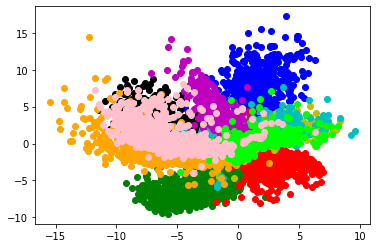

In [ ]:
z = enc(train_images[:10000])

z_0 = z[train_labels[:10000]==0]    # z 배열을 조건을 이용해 slice
z_1 = z[train_labels[:10000]==1]
z_2 = z[train_labels[:10000]==2]
z_3 = z[train_labels[:10000]==3]
z_4 = z[train_labels[:10000]==4]
z_5 = z[train_labels[:10000]==5]
z_6 = z[train_labels[:10000]==6]
z_7 = z[train_labels[:10000]==7]
z_8 = z[train_labels[:10000]==8]
z_9 = z[train_labels[:10000]==9]

print(z_0.shape)
print(z_1.shape)
print(z_2.shape)
print(z_9.shape)

plt.scatter(z_0[:,0], z_0[:,1], c='b')
plt.scatter(z_1[:,0], z_1[:,1], c='g')
plt.scatter(z_2[:,0], z_2[:,1], c='r')
plt.scatter(z_3[:,0], z_3[:,1], c='y')
plt.scatter(z_4[:,0], z_4[:,1], c='k')
plt.scatter(z_5[:,0], z_5[:,1], c='c')
plt.scatter(z_6[:,0], z_6[:,1], c='m')
plt.scatter(z_7[:,0], z_7[:,1], c='orange')
plt.scatter(z_8[:,0], z_8[:,1], c='lime')
plt.scatter(z_9[:,0], z_9[:,1], c = 'pink')
plt.show()

Decoder 부분에 Dense를 쌓았더니 어느정도 구분이 되는 선이 생기기 시작하였다. 

하지만 Dense Layer를 Conv레이어로 수정하라 하였으니 이는 아닌것 같다.

# Conv1D를 사용해보자.

In [ ]:
enc = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(28,28)),
                                  tf.keras.layers.Conv1D(128,kernel_size=2,activation='relu'),
                                  tf.keras.layers.MaxPool1D(pool_size=2),
                                  tf.keras.layers.Conv1D(64,kernel_size=2,activation='relu'),
                                  tf.keras.layers.MaxPool1D(pool_size=2),
                                  tf.keras.layers.Conv1D(32,kernel_size=2,activation='relu'),
                                  tf.keras.layers.MaxPool1D(pool_size=2),
                                  tf.keras.layers.Conv1D(2,kernel_size=2),
                                  tf.keras.layers.Flatten()])

dec = tf.keras.models.Sequential([
                                  tf.keras.layers.InputLayer(input_shape=(n_dim,)),
                                  tf.keras.layers.Reshape(target_shape=(1,n_dim)),
                                  tf.keras.layers.Conv1D(32,kernel_size=1,activation='relu'),
                                  tf.keras.layers.Conv1D(128,kernel_size=1,activation='relu'),
                                  tf.keras.layers.Conv1D(784,kernel_size=1,activation='sigmoid'),
                                  tf.keras.layers.Reshape(target_shape=(28,28))
])

ae = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28, 28)),
  enc,
  dec,                               
])

In [ ]:
ae.compile(optimizer='Adam', # optimizer의 name 혹은 함수 객체 설정
           loss='mse', 
           metrics=['mae'])

ae.fit(train_images, train_images, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0566 - mae: 0.1280
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0484 - mae: 0.1121
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0465 - mae: 0.1082
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0453 - mae: 0.1057
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0445 - mae: 0.1041
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0439 - mae: 0.1027
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0434 - mae: 0.1017
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0430 - mae: 0.1008
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0426 - mae: 0.1000
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0423 - mae: 0.0993


In [ ]:
y_pred = ae(train_images[:10000,])

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx])
  plt.subplot(122)
  plt.imshow(y_pred[idx])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=9999, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=9999), Output()), _do…

(1001, 2)
(1127, 2)
(991, 2)
(978, 2)


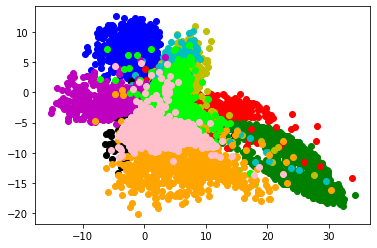

In [ ]:
z = enc(train_images[:10000])

z_0 = z[train_labels[:10000]==0]    # z 배열을 조건을 이용해 slice
z_1 = z[train_labels[:10000]==1]
z_2 = z[train_labels[:10000]==2]
z_3 = z[train_labels[:10000]==3]
z_4 = z[train_labels[:10000]==4]
z_5 = z[train_labels[:10000]==5]
z_6 = z[train_labels[:10000]==6]
z_7 = z[train_labels[:10000]==7]
z_8 = z[train_labels[:10000]==8]
z_9 = z[train_labels[:10000]==9]

print(z_0.shape)
print(z_1.shape)
print(z_2.shape)
print(z_9.shape)

plt.scatter(z_0[:,0], z_0[:,1], c='b')
plt.scatter(z_1[:,0], z_1[:,1], c='g')
plt.scatter(z_2[:,0], z_2[:,1], c='r')
plt.scatter(z_3[:,0], z_3[:,1], c='y')
plt.scatter(z_4[:,0], z_4[:,1], c='k')
plt.scatter(z_5[:,0], z_5[:,1], c='c')
plt.scatter(z_6[:,0], z_6[:,1], c='m')
plt.scatter(z_7[:,0], z_7[:,1], c='orange')
plt.scatter(z_8[:,0], z_8[:,1], c='lime')
plt.scatter(z_9[:,0], z_9[:,1], c = 'pink')
plt.show()

conv1D로 바꾸었더니 Z값이 어느정도 갈라지는 듯한 모습을 보여줌 

Conv1D를 활용하니 MAE의 값도 상당히 낮은것으로 관측되어 최대한 줄여보고자 한다. 

In [ ]:
enc = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(28,28)),
                                  tf.keras.layers.Conv1D(128,kernel_size=2,activation='elu'),
                                  tf.keras.layers.MaxPool1D(pool_size=2),
                                  tf.keras.layers.Conv1D(64,kernel_size=2,activation='elu'),
                                  tf.keras.layers.MaxPool1D(pool_size=2),
                                  tf.keras.layers.Conv1D(32,kernel_size=2,activation='elu'),
                                  tf.keras.layers.MaxPool1D(pool_size=2),
                                  tf.keras.layers.Conv1D(2,kernel_size=2),
                                  tf.keras.layers.Flatten()])

dec = tf.keras.models.Sequential([
                                  tf.keras.layers.InputLayer(input_shape=(n_dim,)),
                                  tf.keras.layers.Reshape(target_shape=(1,n_dim)),
                                  tf.keras.layers.Conv1D(32,kernel_size=1,activation='elu'),
                                  tf.keras.layers.Conv1D(128,kernel_size=1,activation='elu'),
                                  tf.keras.layers.Conv1D(784,kernel_size=1,activation='sigmoid'),
                                  tf.keras.layers.Reshape(target_shape=(28,28))
])

ae = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28, 28)),
  enc,
  dec,                               
])

In [ ]:
ae.compile(optimizer='Adam', # optimizer의 name 혹은 함수 객체 설정
           loss='mse', 
           metrics=['mae'])

ae.fit(train_images, train_images, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0552 - mae: 0.1274
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0489 - mae: 0.1135
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0469 - mae: 0.1090
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0456 - mae: 0.1062
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0448 - mae: 0.1043
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0441 - mae: 0.1027
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0437 - mae: 0.1017
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0431 - mae: 0.1006
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0428 - mae: 0.0997
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0424 - mae: 0.0990


In [ ]:
y_pred = ae(train_images[:10000,])

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx])
  plt.subplot(122)
  plt.imshow(y_pred[idx])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=9999, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=9999), Output()), _do…

(1001, 2)
(1127, 2)
(991, 2)
(978, 2)


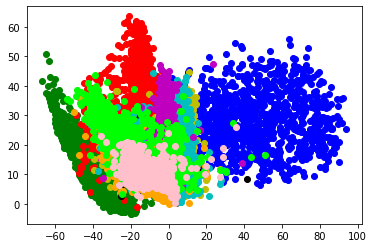

In [ ]:
z = enc(train_images[:10000])

z_0 = z[train_labels[:10000]==0]    # z 배열을 조건을 이용해 slice
z_1 = z[train_labels[:10000]==1]
z_2 = z[train_labels[:10000]==2]
z_3 = z[train_labels[:10000]==3]
z_4 = z[train_labels[:10000]==4]
z_5 = z[train_labels[:10000]==5]
z_6 = z[train_labels[:10000]==6]
z_7 = z[train_labels[:10000]==7]
z_8 = z[train_labels[:10000]==8]
z_9 = z[train_labels[:10000]==9]

print(z_0.shape)
print(z_1.shape)
print(z_2.shape)
print(z_9.shape)

plt.scatter(z_0[:,0], z_0[:,1], c='b')
plt.scatter(z_1[:,0], z_1[:,1], c='g')
plt.scatter(z_2[:,0], z_2[:,1], c='r')
plt.scatter(z_3[:,0], z_3[:,1], c='y')
plt.scatter(z_4[:,0], z_4[:,1], c='k')
plt.scatter(z_5[:,0], z_5[:,1], c='c')
plt.scatter(z_6[:,0], z_6[:,1], c='m')
plt.scatter(z_7[:,0], z_7[:,1], c='orange')
plt.scatter(z_8[:,0], z_8[:,1], c='lime')
plt.scatter(z_9[:,0], z_9[:,1], c = 'pink')
plt.show()

어느정도 잘 갈라진듯한 모습을 보인다. 하지만 여전히 아직 잘 구분이 되지 않는 숫자가 보인다.

In [ ]:
import ipywidgets as widgets

u=widgets.FloatSlider(min=-20.0, max=20.0)
v=widgets.FloatSlider(min=-20.0, max=20.0)

ui = widgets.HBox([u,v])

def z_test(u, v):
  z_test = np.array([[u,v]])  
  print(z_test)

  img_gen = dec(z_test)
  plt.imshow(img_gen[0])
  plt.show()  

out = widgets.interactive_output(z_test, {'u': u, 'v': v})

display(ui, out)

Output()

Activation Function을 elu로 바꾸었더니 조금더 잘 나누어 지는 모습을 보임

# MAXPooling을 제거하고 stride로 대체, kernel Size의 값을 변경하여 진행

In [ ]:
enc = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(28,28)),
                                  tf.keras.layers.Conv1D(256,kernel_size=3, strides=2,activation='elu'),
                                  tf.keras.layers.Conv1D(64,kernel_size=3, strides=2,activation='elu'),
                                  tf.keras.layers.Conv1D(32,kernel_size=3, strides=2,activation='elu'),
                                  tf.keras.layers.Conv1D(2,kernel_size=2),
                                  tf.keras.layers.Flatten()])

dec = tf.keras.models.Sequential([
                                  tf.keras.layers.InputLayer(input_shape=(n_dim,)),
                                  tf.keras.layers.Reshape(target_shape=(1, n_dim)),
                                  tf.keras.layers.Conv1D(16,kernel_size=1,activation='elu'),
                                  tf.keras.layers.Conv1D(64,kernel_size=1,activation='elu'),
                                  tf.keras.layers.Conv1D(256,kernel_size=1,activation='elu'),
                                  tf.keras.layers.Conv1D(784,kernel_size=1,activation='sigmoid'),
                                  tf.keras.layers.Reshape(target_shape=(28,28))
])

ae = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28, 28)),
  enc,
  dec,                               
])

In [ ]:
ae.compile(optimizer='RMSProp', # optimizer의 name 혹은 함수 객체 설정
           loss='mse', 
           metrics=['mae'])

ae.fit(train_images, train_images, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0509 - mae: 0.1174
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0447 - mae: 0.1042
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0426 - mae: 0.0997
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0414 - mae: 0.0973
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0406 - mae: 0.0957
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0400 - mae: 0.0944
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0395 - mae: 0.0936
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0391 - mae: 0.0927
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0389 - mae: 0.0922
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0387 - mae: 0.0919


In [ ]:
y_pred = ae(train_images[:10000,])

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx])
  plt.subplot(122)
  plt.imshow(y_pred[idx])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=9999, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=9999), Output()), _do…

(1001, 2)
(1127, 2)
(991, 2)
(978, 2)


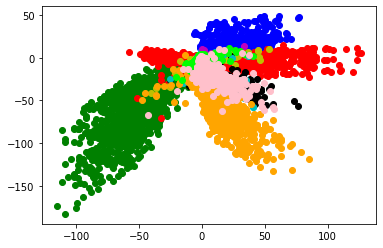

In [ ]:
z = enc(train_images[:10000])

z_0 = z[train_labels[:10000]==0]    # z 배열을 조건을 이용해 slice
z_1 = z[train_labels[:10000]==1]
z_2 = z[train_labels[:10000]==2]
z_3 = z[train_labels[:10000]==3]
z_4 = z[train_labels[:10000]==4]
z_5 = z[train_labels[:10000]==5]
z_6 = z[train_labels[:10000]==6]
z_7 = z[train_labels[:10000]==7]
z_8 = z[train_labels[:10000]==8]
z_9 = z[train_labels[:10000]==9]

print(z_0.shape)
print(z_1.shape)
print(z_2.shape)
print(z_9.shape)

plt.scatter(z_0[:,0], z_0[:,1], c='b')
plt.scatter(z_1[:,0], z_1[:,1], c='g')
plt.scatter(z_2[:,0], z_2[:,1], c='r')
plt.scatter(z_3[:,0], z_3[:,1], c='y')
plt.scatter(z_4[:,0], z_4[:,1], c='k')
plt.scatter(z_5[:,0], z_5[:,1], c='c')
plt.scatter(z_6[:,0], z_6[:,1], c='m')
plt.scatter(z_7[:,0], z_7[:,1], c='orange')
plt.scatter(z_8[:,0], z_8[:,1], c='lime')
plt.scatter(z_9[:,0], z_9[:,1], c = 'pink')
plt.show()

점점 잘 구분이 되는 영역이 생기는 모습을 보여준다.

In [ ]:
import ipywidgets as widgets

u=widgets.FloatSlider(min=-20.0, max=20.0)
v=widgets.FloatSlider(min=-20.0, max=20.0)

ui = widgets.HBox([u,v])

def z_test(u, v):
  z_test = np.array([[u,v]])  
  print(z_test)

  img_gen = dec(z_test)
  plt.imshow(img_gen[0])
  plt.show()  

out = widgets.interactive_output(z_test, {'u': u, 'v': v})

display(ui, out)

Output()

In [ ]:
n_dim=2
enc = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(28,28)),
                                  tf.keras.layers.Conv1D(128,kernel_size=5,activation='elu',strides=2),
                                  tf.keras.layers.Conv1D(64,kernel_size=5,activation='elu',strides=2),
                                  tf.keras.layers.Conv1D(16,kernel_size=3,activation='elu'),
                                  tf.keras.layers.Conv1D(2,kernel_size=2),
                                  tf.keras.layers.Flatten()])

dec = tf.keras.models.Sequential([
                                  tf.keras.layers.InputLayer(input_shape=(n_dim,)),
                                  tf.keras.layers.Reshape(target_shape=(1, n_dim)),
                                  tf.keras.layers.Conv1D(16,kernel_size=1,activation='elu'),
                                  tf.keras.layers.Conv1D(64,kernel_size=1,activation='elu'),
                                  tf.keras.layers.Conv1D(256,kernel_size=1,activation='elu'),
                                  tf.keras.layers.Conv1D(784,kernel_size=1,activation='sigmoid'),
                                  tf.keras.layers.Reshape(target_shape=(28,28))
])

ae = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28, 28)),
  enc,
  dec,                               
])

In [ ]:
ae.compile(optimizer='Adam', # optimizer의 name 혹은 함수 객체 설정
           loss='mse', 
           metrics=['mae'])

ae.fit(train_images, train_images, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0519 - mae: 0.1207
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0450 - mae: 0.1047
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0427 - mae: 0.0997
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0414 - mae: 0.0968
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0403 - mae: 0.0945
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0396 - mae: 0.0931
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0391 - mae: 0.0921
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0387 - mae: 0.0913
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0383 - mae: 0.0906
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0380 - mae: 0.0901


In [ ]:
y_pred = ae(train_images[:10000,])

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx])
  plt.subplot(122)
  plt.imshow(y_pred[idx])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=9999, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=9999), Output()), _do…

(1001, 2)
(1127, 2)
(991, 2)
(978, 2)


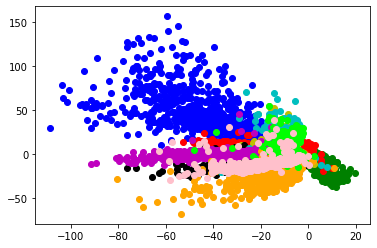

In [ ]:
z = enc(train_images[:10000])

z_0 = z[train_labels[:10000]==0]    # z 배열을 조건을 이용해 slice
z_1 = z[train_labels[:10000]==1]
z_2 = z[train_labels[:10000]==2]
z_3 = z[train_labels[:10000]==3]
z_4 = z[train_labels[:10000]==4]
z_5 = z[train_labels[:10000]==5]
z_6 = z[train_labels[:10000]==6]
z_7 = z[train_labels[:10000]==7]
z_8 = z[train_labels[:10000]==8]
z_9 = z[train_labels[:10000]==9]

print(z_0.shape)
print(z_1.shape)
print(z_2.shape)
print(z_9.shape)

plt.scatter(z_0[:,0], z_0[:,1], c='b')
plt.scatter(z_1[:,0], z_1[:,1], c='g')
plt.scatter(z_2[:,0], z_2[:,1], c='r')
plt.scatter(z_3[:,0], z_3[:,1], c='y')
plt.scatter(z_4[:,0], z_4[:,1], c='k')
plt.scatter(z_5[:,0], z_5[:,1], c='c')
plt.scatter(z_6[:,0], z_6[:,1], c='m')
plt.scatter(z_7[:,0], z_7[:,1], c='orange')
plt.scatter(z_8[:,0], z_8[:,1], c='lime')
plt.scatter(z_9[:,0], z_9[:,1], c = 'pink')
plt.show()

In [ ]:
import ipywidgets as widgets

u=widgets.FloatSlider(min=-20.0, max=20.0)
v=widgets.FloatSlider(min=-20.0, max=20.0)

ui = widgets.HBox([u,v])

def z_test(u, v):
  z_test = np.array([[u,v]])  
  print(z_test)

  img_gen = dec(z_test)
  plt.imshow(img_gen[0])
  plt.show()  

out = widgets.interactive_output(z_test, {'u': u, 'v': v})

display(ui, out)

Output()

# n_dim의 갯수를 늘려보고자 한다. 

In [ ]:
n_dim = 4
enc = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(28,28)),
                                  tf.keras.layers.Conv1D(128,kernel_size=5,activation='elu',strides=2),
                                  tf.keras.layers.Conv1D(64,kernel_size=5,activation='elu',strides=2),
                                  tf.keras.layers.Conv1D(16,kernel_size=3,activation='elu'),
                                  tf.keras.layers.Conv1D(n_dim,kernel_size=2),
                                  tf.keras.layers.Flatten()])

dec = tf.keras.models.Sequential([
                                  tf.keras.layers.InputLayer(input_shape=(n_dim,)),
                                  tf.keras.layers.Reshape(target_shape=(1, n_dim)),
                                  tf.keras.layers.Conv1D(16,kernel_size=1,activation='elu'),
                                  tf.keras.layers.Conv1D(64,kernel_size=1,activation='elu'),
                                  tf.keras.layers.Conv1D(256,kernel_size=1,activation='elu'),
                                  tf.keras.layers.Conv1D(784,kernel_size=1,activation='sigmoid'),
                                  tf.keras.layers.Reshape(target_shape=(28,28))
])

ae = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28, 28)),
  enc,
  dec,                               
])

In [ ]:
ae.compile(optimizer='Adam', # optimizer의 name 혹은 함수 객체 설정
           loss='mse', 
           metrics=['mae'])

ae.fit(train_images, train_images, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0415 - mae: 0.0994
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0326 - mae: 0.0803
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0308 - mae: 0.0760
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0297 - mae: 0.0735
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0290 - mae: 0.0719
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0284 - mae: 0.0707
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0280 - mae: 0.0698
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0276 - mae: 0.0690
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0273 - mae: 0.0683
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0270 - mae: 0.0678


In [ ]:
y_pred = ae(train_images[:10000,])

def io_imshow(idx):
  print('GT label:', train_labels[idx])
  plt.subplot(121)
  plt.imshow(train_images[idx])
  plt.subplot(122)
  plt.imshow(y_pred[idx])
  plt.show()

widgets.interact(io_imshow, idx=widgets.IntSlider(min=0, max=9999, continuous_update=False));

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=9999), Output()), _do…

(1001, 4)
(1127, 4)
(991, 4)
(978, 4)


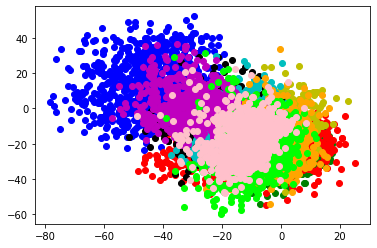

In [ ]:
z = enc(train_images[:10000])

z_0 = z[train_labels[:10000]==0]    # z 배열을 조건을 이용해 slice
z_1 = z[train_labels[:10000]==1]
z_2 = z[train_labels[:10000]==2]
z_3 = z[train_labels[:10000]==3]
z_4 = z[train_labels[:10000]==4]
z_5 = z[train_labels[:10000]==5]
z_6 = z[train_labels[:10000]==6]
z_7 = z[train_labels[:10000]==7]
z_8 = z[train_labels[:10000]==8]
z_9 = z[train_labels[:10000]==9]

print(z_0.shape)
print(z_1.shape)
print(z_2.shape)
print(z_9.shape)

plt.scatter(z_0[:,0], z_0[:,1], c='b')
plt.scatter(z_1[:,0], z_1[:,1], c='g')
plt.scatter(z_2[:,0], z_2[:,1], c='r')
plt.scatter(z_3[:,0], z_3[:,1], c='y')
plt.scatter(z_4[:,0], z_4[:,1], c='k')
plt.scatter(z_5[:,0], z_5[:,1], c='c')
plt.scatter(z_6[:,0], z_6[:,1], c='m')
plt.scatter(z_7[:,0], z_7[:,1], c='orange')
plt.scatter(z_8[:,0], z_8[:,1], c='lime')
plt.scatter(z_9[:,0], z_9[:,1], c = 'pink')
plt.show()

Loss값은 엄청 작지만 잘 퍼져있지 않은 것처럼 보인다. 하지만 우리는 Z의 차원을 4개 차원으로 놓았음을 주의해야 한다. 4

In [ ]:
import ipywidgets as widgets

s=widgets.FloatSlider(min=-20.0, max=20.0)
t=widgets.FloatSlider(min=-20.0, max=20.0)
u=widgets.FloatSlider(min=-20.0, max=20.0)
v=widgets.FloatSlider(min=-20.0, max=20.0)

ui = widgets.HBox([s,t,u,v])

def z_test(s,t,u, v):
  z_test = np.array([[s,t,u,v]])  
  print(z_test)

  img_gen = dec(z_test)
  plt.imshow(img_gen[0])
  plt.show()  

out = widgets.interactive_output(z_test, {'s':s, 't':t, 'u': u, 'v': v})

display(ui, out)

Output()